In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib as M
from numpy.matlib import rand,zeros,ones,empty,eye
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
np.set_printoptions(precision=3)

In [2]:
%matplotlib inline
plt.style.use('ggplot')

### Importing Data

site_list = ['Saginaw Malleable','Pontiac North Industrial','Linden Road','Bay City Powertrain','Coldwater Road','Davison Road','Greenpoint','Hemphill','Saginaw Malleable Peninsula','Van Buren','Buick City','Flint West (Kettering)','Danville','Allison Gas Turbine','Framingham','Massena','Salina', 'Tonawanda','Elyria','Toledo']
# Loads Previously Created Data (3D matrix, depth = 100, columns are criteria, rows are sites)
results = np.load('results.npy') 

N=100 # number of simulations is N-1, referred to as N

# Import weights, use as np.dot(A,wgts)
# 1 Incentives, 2 Permitting, 3 Substation, 4 Environmental, 5 Proximity to Partners,
# 6 Weather, 7 Access, 8 Solar Radiation, 9 Land Stabillity
eyes = eye((11)).A
arr = np.array([20., 16., 15., 15., 8., 5., 5., 5., 4., 4., 3.])/100
wgts = eyes*arr

## Sensitivity Analysis - Part 2

# Analysis setting all (1) Incentives, (2) Permitting, (3) Substation, and (4) Environmental Equal

/Users/Spencer/Distributions_et_al/anaconda/envs/pandahacks/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


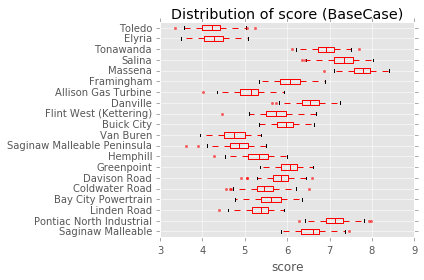

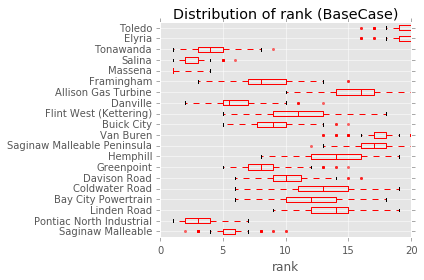

In [4]:
#### Use for BaseCase

qualifier = 'BaseCase'
t2 = '$N=100$, $\sigma = 1$'
def plot_res(_type, _qualifiertext, _arr, _n, _wgts, _site_list):
    # _type is 'score' or 'rank'
    score_list = []
    
    if _type == 'score':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]))
    if _type == 'rank':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]).rank(ascending=False))
            
    scores = pd.DataFrame(score_list)

    # Plot as 10 histograms of distribution of scores
    flierprops = dict(marker='.', markerfacecolor='red', alpha=0.6, markersize=6, markeredgecolor='none')
    bp = scores.boxplot(vert=0, flierprops=flierprops)
    plt.setp(bp['boxes'], color='red')
    plt.setp(bp['whiskers'],color='red')
    plt.setp(bp['fliers'],color='red')
    plt.tight_layout()
    plt.xlabel(_type)
    #plt.title('Distribution of ' + _type + ' (' + _qualifiertext + ')')
    plt.savefig(r'results/' + _qualifiertext + r'_' + _type + '.png', transparent=True, dpi=1000)
    plt.show()
    
    return scores

basescores = plot_res('score', qualifier, results, N, wgts, site_list)
baseranks = plot_res('rank', qualifier, results, N, wgts, site_list)

In [5]:
## Incentives

# Set all of the (20, c1, 101) to "5" .. or 0 .. or 10?
results_uni = np.copy(results)
results_uni[:,0,:]=5
qualifier = 'Incentives'

In [ ]:
#### Permitting

# Set all of the (20, c1, 101) to "5" .. or 0 .. or 10?
results_uni = np.copy(results)
results_uni[:,1,:]=5
qualifier = 'Permitting'

In [ ]:
#### Substation

# Set all of the (20, c1, 101) to "5" .. or 0 .. or 10?
results_uni = np.copy(results)
results_uni[:,2,:]=5
qualifier = 'Substation'

In [ ]:
#### Evironmental

# Set all of the (20, c1, 101) to "5" .. or 0 .. or 10?
results_uni = np.copy(results)
results_uni[:,3,:]=5
qualifier = 'Environmental'

In [ ]:
# Run one of the above criteria cells first

def plot_res(_type, _qualifiertext, _arr, _n, _wgts, _site_list):
    # _type is 'score' or 'rank'
    score_list = []
    
    if _type == 'score':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]))
    if _type == 'rank':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]).rank(ascending=False))        
    scores = pd.DataFrame(score_list)
    # Plot as 10 historgrams of distribution of scores
    flierprops = dict(marker='.', markerfacecolor='blue', alpha=0.6, markersize=6, markeredgecolor='none')
    bp = scores.boxplot(vert=0, flierprops=flierprops)
    plt.setp(bp['boxes'], color='blue')
    plt.setp(bp['whiskers'],color='blue')
    plt.setp(bp['fliers'],color='blue')
    plt.setp(bp['medians'], color='blue')
    plt.tight_layout()
    plt.xlabel(_type)
    plt.title(_qualifiertext)
    plt.savefig(r'results/' + _qualifiertext + r'_' + _type + '.png', transparent=True, dpi=1000)
    plt.show()
    
    return scores

# scores = plot_res('score', qualifier, results_uni, N, wgts, site_list)
ranks = plot_res('rank', qualifier, results_uni, N, wgts, site_list)

/Users/Spencer/Distributions_et_al/anaconda/envs/pandahacks/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


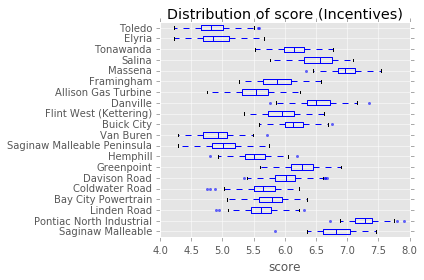

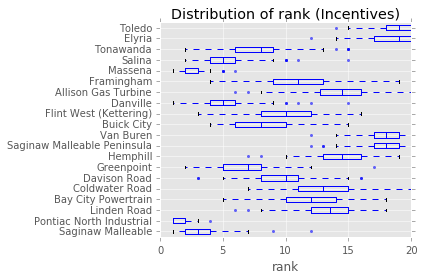

/Users/Spencer/Distributions_et_al/anaconda/envs/pandahacks/lib/python2.7/site-packages/ipykernel/__main__.py:40: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


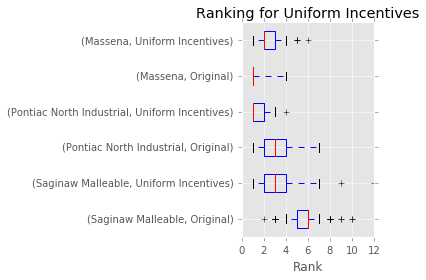

/Users/Spencer/Distributions_et_al/anaconda/envs/pandahacks/lib/python2.7/site-packages/ipykernel/__main__.py:47: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


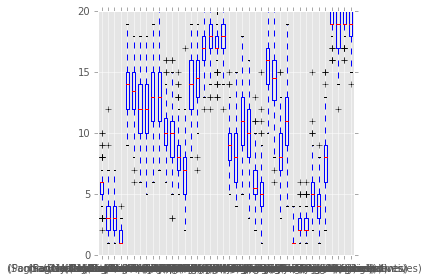

In [6]:
# Hierarchical index 0 is Base, 1 is Uniform on One Variable
df_ranks = pd.concat([baseranks, ranks], keys=[i for i in range(0,100)])
df_ranks.index = df_ranks.index.set_levels([['Original','Uniform Incentives'],[i for i in range(0,100)]])
df_ranks = df_ranks.unstack(0); df_ranks

# Plotting Saginaw, Pontiac North, and Massena
df_ranks[['Saginaw Malleable','Pontiac North Industrial','Massena']].boxplot(vert=0)
plt.title('Ranking for Uniform Incentives')
plt.xlabel('Rank')
plt.tight_layout()
plt.savefig('Incentives_Plot1.pdf')
plt.show()

df_ranks.boxplot(); plt.show()

### Sort by Upper Fence

In [11]:
# Find upper fence
ranks.quantile(0.25)

Saginaw Malleable    2
dtype: float64

In [21]:
# Sort by descending quantiles
sort = ranks.quantile(0.25).sort_values(ascending=False)
rix = sort.index

In [25]:
# Reindex
ranks_inc = ranks.reindex_axis(rix, axis=1)

/Users/Spencer/Distributions_et_al/anaconda/envs/pandahacks/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


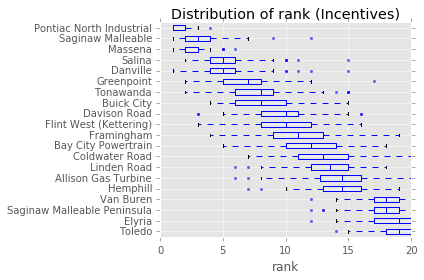

In [26]:
# Run the uniform criteria quantile sorting method first

def plot_res(_type, _qualifiertext, _arr, _n, _wgts, _site_list):
    # _type is 'score' or 'rank'
    score_list = []
    
    if _type == 'score':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]))
    if _type == 'rank':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]).rank(ascending=False))        
    scores = pd.DataFrame(score_list)
    rix = scores.quantile(.25).sort_values(ascending=False).index
    scores = scores.reindex_axis(rix, axis=1)
    # Plot as 10 historgrams of distribution of scores
    flierprops = dict(marker='.', markerfacecolor='blue', alpha=0.6, markersize=6, markeredgecolor='none')
    bp = scores.boxplot(vert=0, flierprops=flierprops)
    plt.setp(bp['boxes'], color='blue')
    plt.setp(bp['whiskers'],color='blue')
    plt.setp(bp['fliers'],color='blue')
    plt.setp(bp['medians'], color='blue')
    plt.tight_layout()
    plt.xlabel(_type)
    plt.title('Distribution of ' + _type + ' (' + _qualifiertext + ')')
    plt.savefig(r'results/' + _qualifiertext + r'_' + _type + '.png', transparent=True, dpi=1000)
    plt.show()
    
    return scores, rix

# scores = plot_res('score', qualifier, results_uni, N, wgts, site_list)
ranks = plot_res('rank', qualifier, results_uni, N, wgts, site_list)

In [ ]:
ranks[rix]